In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
import math

In [2]:
pumpkin_df = pd.read_excel("/home/friday/Documents/MS/Coursework/1st Sem/Deep Learning/ML/asssign1/dataset/logistic-regression/Pumpkin_Seeds_Dataset.xlsx")
pumpkin_df.head()
features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness']

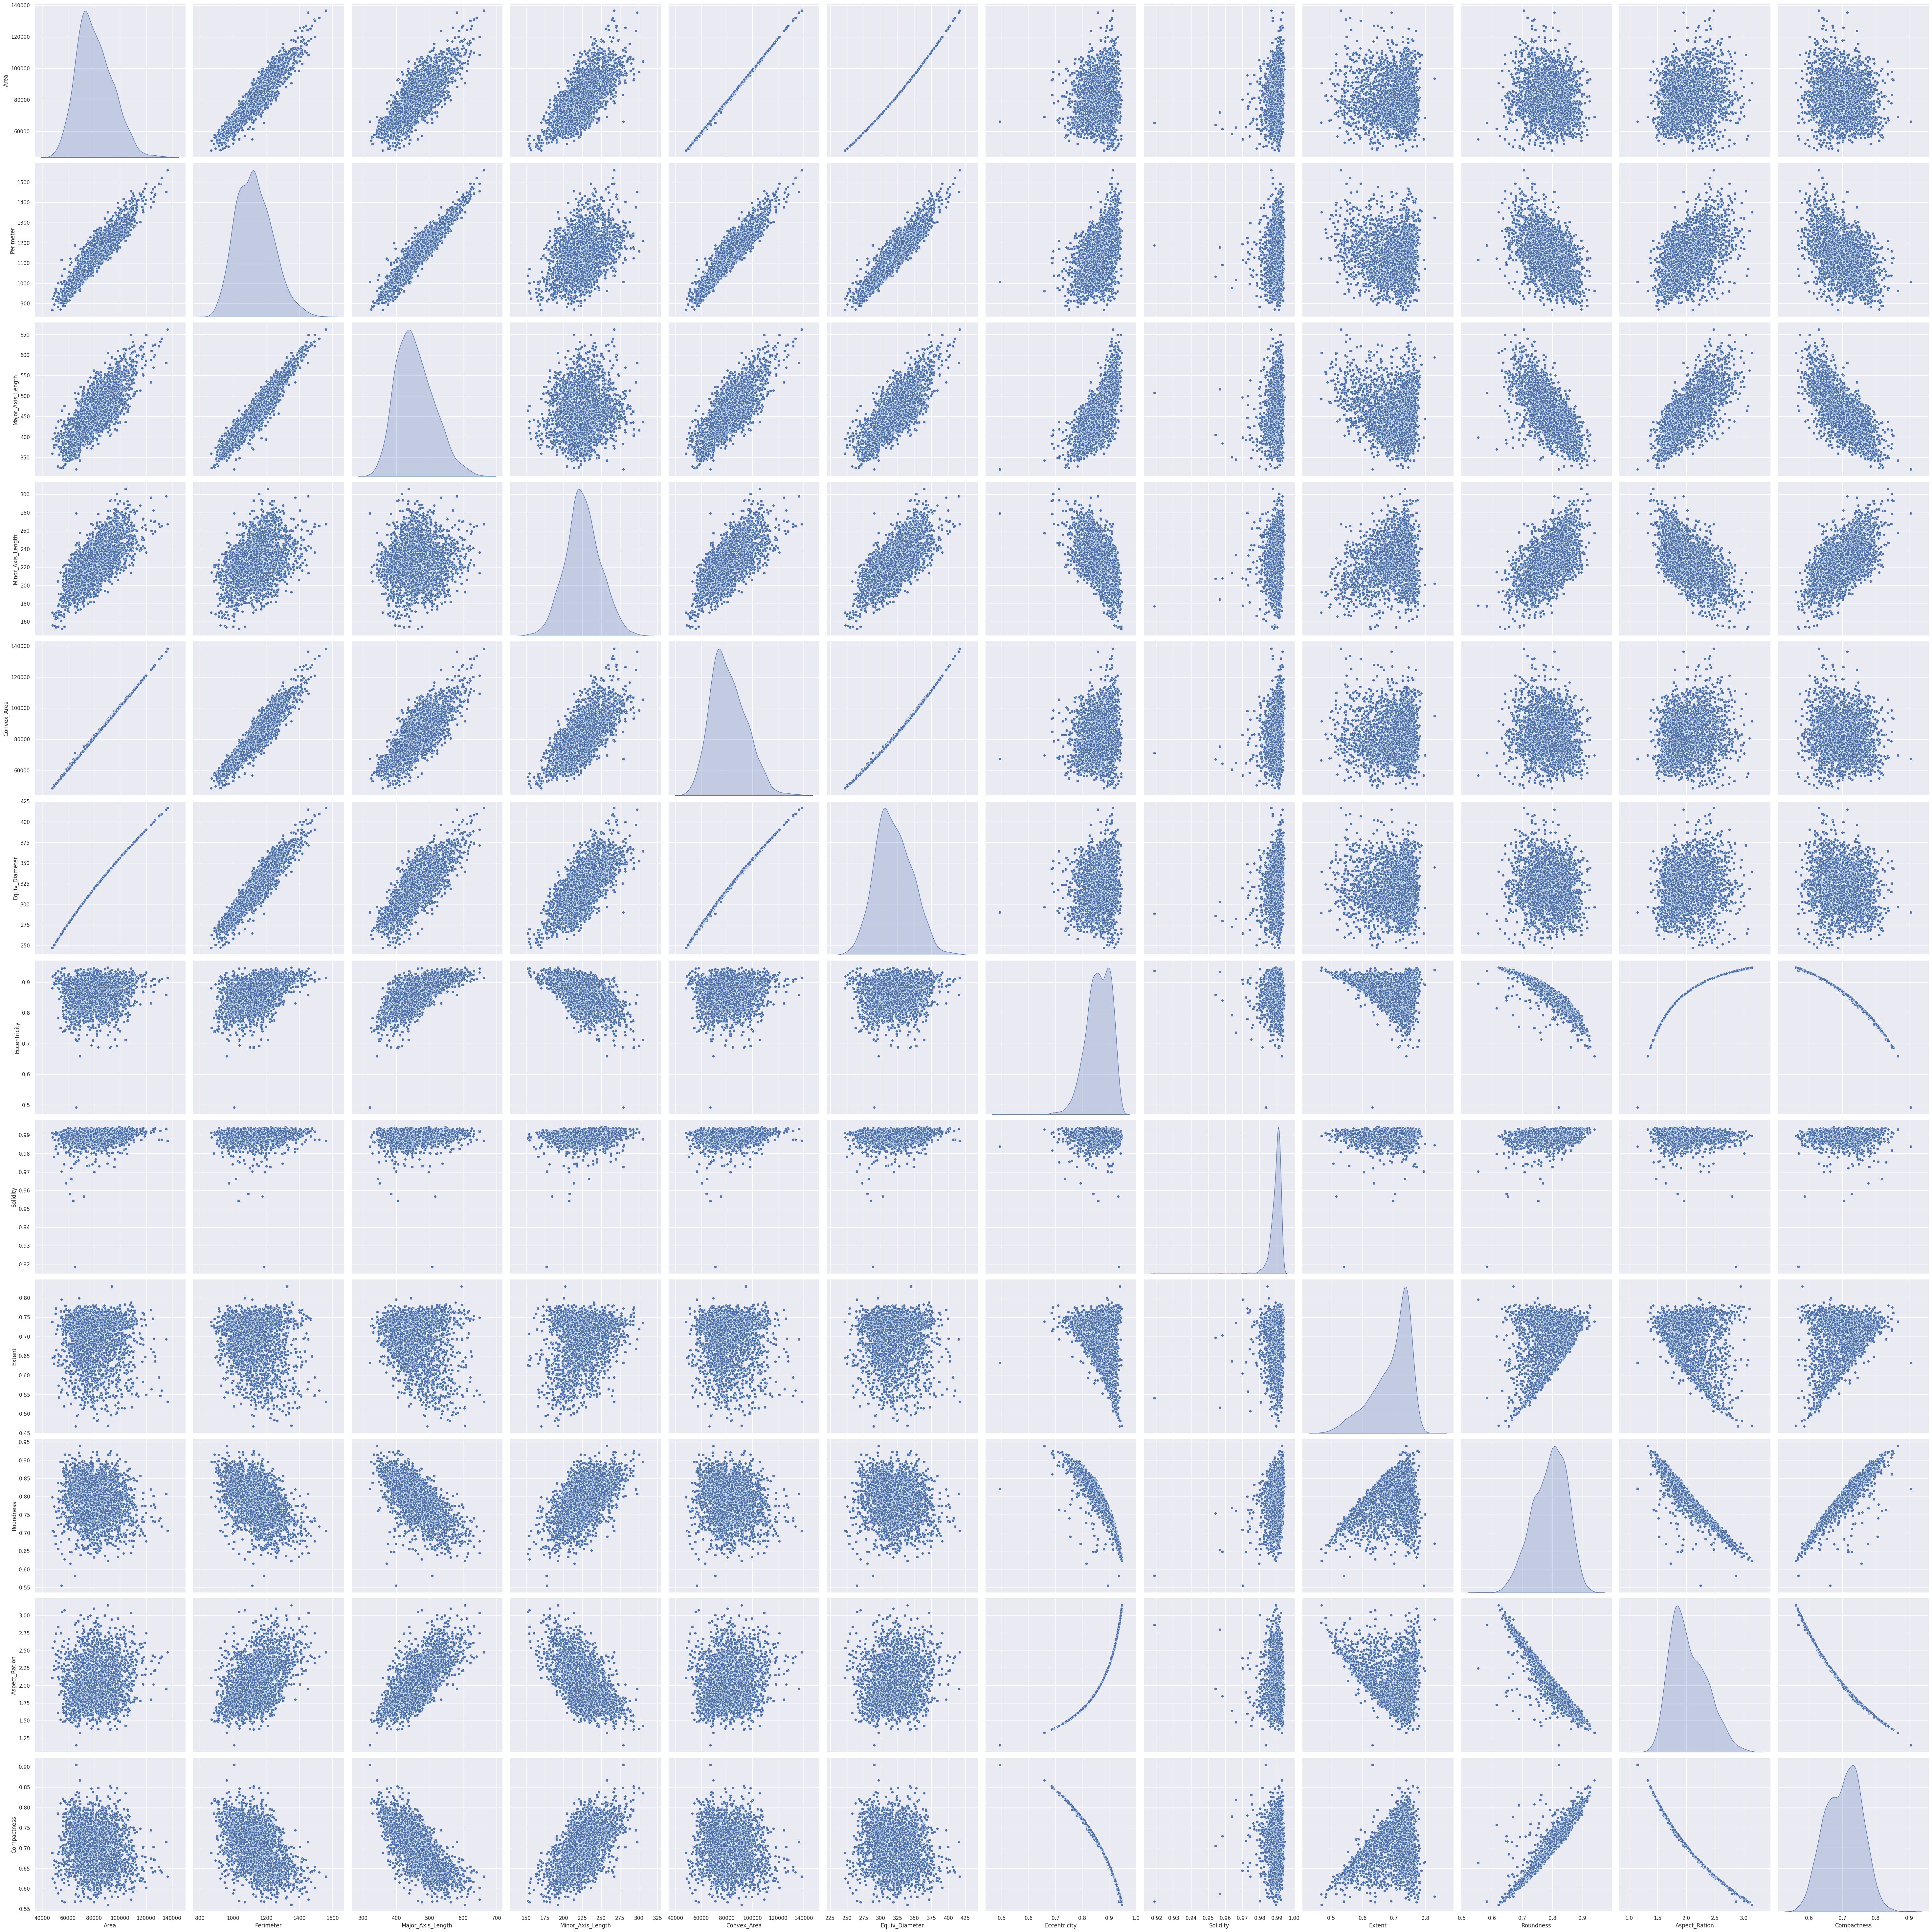

In [3]:
sns.set()
sns.pairplot(pumpkin_df[features],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

/tmp/ipykernel_216483/2023976101.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  z_scores = z_scores.groupby(pumpkin_df.Class).apply(zscore)


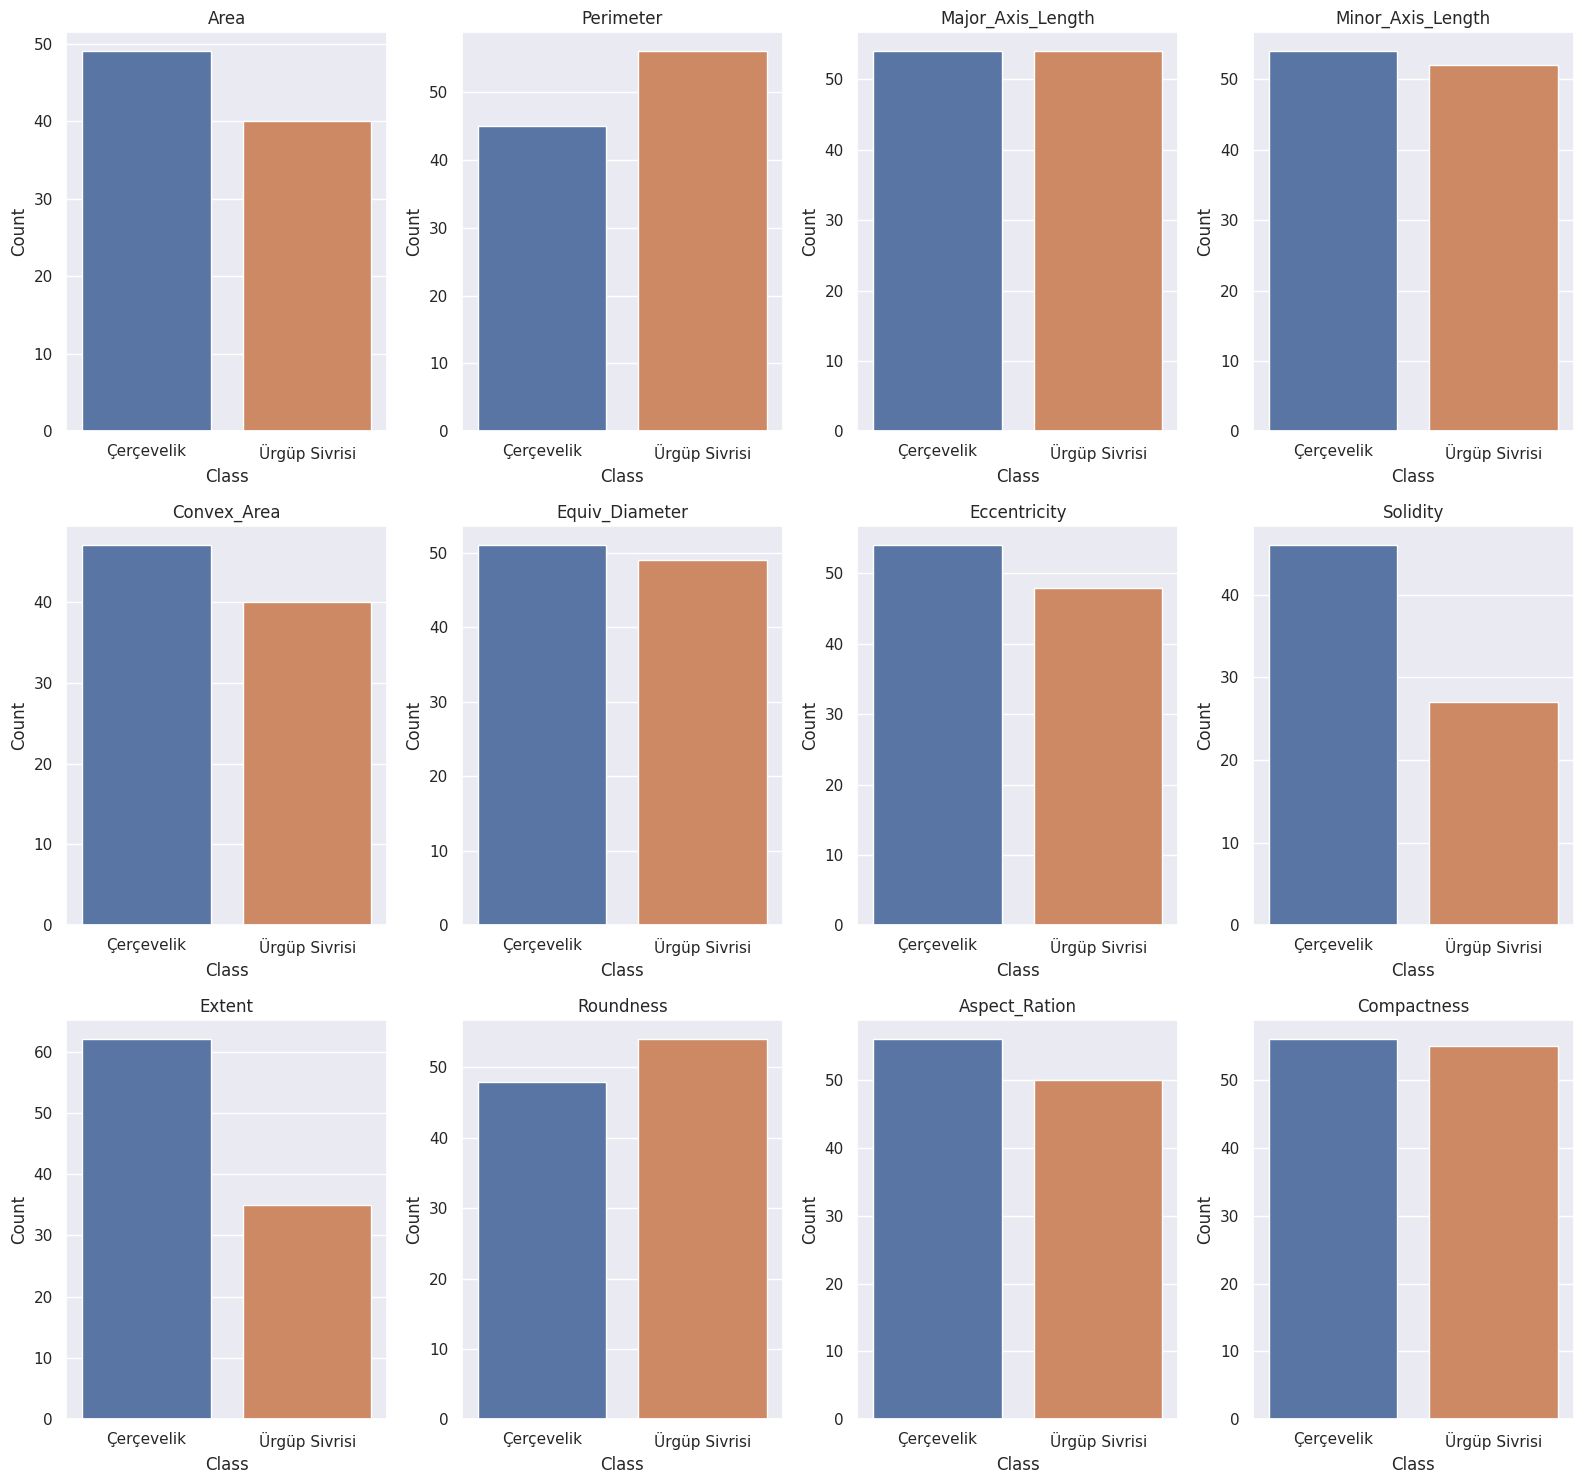

In [4]:
features = pumpkin_df.columns[:-1]
z_scores = pumpkin_df[features]
z_scores = z_scores.groupby(pumpkin_df.Class).apply(zscore)
outliers = z_scores.abs().ge(2).groupby(pumpkin_df.Class).sum()

n_cols = 4
n_rows = math.ceil(len(features)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.barplot(x=outliers.index, y=outliers[feature], ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(feature)
    
for i in range(i+1, len(ax)):
    ax[i].axis('off')
plt.tight_layout()

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [7]:
# Normalization Shit
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.fit_transform(X_val)

In [8]:
X = pumpkin_df[features]
y=pumpkin_df.Class

In [9]:
import numpy as np
from sklearn.metrics import recall_score, f1_score, precision_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (predictions - y))
            db = (1/num_samples) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        y_pred = [1 if p >= 0.5 else 0 for p in predictions]
        return y_pred

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data
    np.random.seed(42)
    
    # Initialize and train the model
    model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
    model.fit(X_train_norm, y_train)
    
    # Make predictions
    y_pred = model.predict(X_train_norm)
    accuracy = np.mean(y_pred == y_train)
    print("Accuracy:", accuracy)
    recall = recall_score(y_train, y_pred, average="binary")
    print("Recall:", recall)
    score = f1_score(y_train, y_pred, average='binary')
    print('F-Measure: %.3f' % score)
    precision = precision_score(y_train, y_pred, average='binary')
    print('Precision: %.3f' % precision)

Accuracy: 0.8706666666666667
Recall: 0.8335644937586685
F-Measure: 0.861
Precision: 0.890
